Saving estudiantes_rendimiento (1).csv to estudiantes_rendimiento (1) (4).csv
✅ Archivo cargado: estudiantes_rendimiento (1) (4).csv

📋 Columnas disponibles:
['ID', 'Edad', 'Horas_estudio', 'Asistencia', 'Participacion_actividades', 'Promedio_calificaciones', 'Motivacion', 'Acceso_recursos', 'Tiempo_plataforma', 'Rendimiento']

📊 Evaluación del modelo:
MAE  - Train: 1.27, Test: 1.15
RMSE - Train: 1.45, Test: 1.41
R²    - Train: 0.10, Test: -0.23


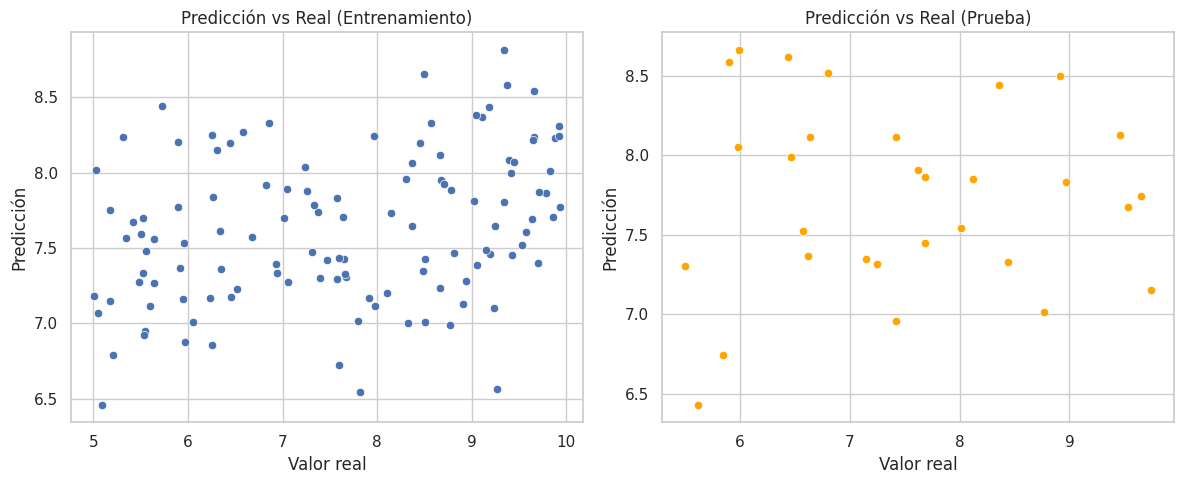

In [31]:
## Validación del Modelo

## En este notebook se comparan las predicciones del modelo entrenado sobre los datos de entrenamiento y prueba.

## Se utilizaron métricas de regresión como:
##  - MAE (Error Absoluto Medio)
##  - RMSE (Raíz del Error Cuadrático Medio)
##  - R² (Coeficiente de determinación)

##  Los gráficos muestran la relación entre los valores reales y las predicciones. Si los puntos están cercanos a la línea diagonal, el modelo predice bien. Se observa que [completa tú según los resultados].

##  Esto permite evaluar el desempeño y generalización del modelo.


# 1. Subir archivo CSV en Colab
from google.colab import files
import pandas as pd
import io

# Subir archivo
uploaded = files.upload()

# Leer el nuevo archivo
nombre_archivo = next(iter(uploaded))  # obtiene el nombre automáticamente
df = pd.read_csv(io.BytesIO(uploaded[nombre_archivo]))
print(f"✅ Archivo cargado: {nombre_archivo}")

# Verifica columnas para asegurarnos
print("\n📋 Columnas disponibles:")
print(df.columns.tolist())

# 2. Seleccionar la variable objetivo
objetivo = 'Promedio_calificaciones'
y = df[objetivo]
X = df.drop(columns=[objetivo])

# 3. Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)

# 4. Separar en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Entrenar modelo
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 6. Predicciones
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

# 7. Evaluación del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# 8. Mostrar resultados
print("\n📊 Evaluación del modelo:")
print(f"MAE  - Train: {mae_train:.2f}, Test: {mae_test:.2f}")
print(f"RMSE - Train: {rmse_train:.2f}, Test: {rmse_test:.2f}")
print(f"R²    - Train: {r2_train:.2f}, Test: {r2_test:.2f}")

# 9. Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Train
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.title("Predicción vs Real (Entrenamiento)")
plt.xlabel("Valor real")
plt.ylabel("Predicción")

# Test
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, color='orange')
plt.title("Predicción vs Real (Prueba)")
plt.xlabel("Valor real")
plt.ylabel("Predicción")

plt.tight_layout()
plt.show()


##  📌 Interpretación y conclusiones del modelo
##  El modelo que entrené busca predecir el promedio de calificaciones de los estudiantes a partir de variables como edad, horas de estudio, asistencia, participación en actividades, motivación, entre otras.

##  El error medio (MAE) en los datos de prueba fue de 1.15 puntos, lo que indica que el modelo se equivoca, en promedio, un poco más de un punto respecto a las calificaciones reales. En una escala de 5 a 10, esta diferencia no es menor.

##  El valor R² fue de 0.10 en entrenamiento y -0.23 en prueba. Esto indica que el modelo no logra explicar bien la variabilidad de las calificaciones, especialmente en los datos nuevos (de prueba). Un valor negativo en R² significa que incluso un modelo que solo predice el promedio sería más efectivo.

##  En los gráficos de “Predicción vs Real” se observa que los puntos están dispersos y no siguen una línea clara, lo que muestra que el modelo no logra captar correctamente el patrón real de los datos.

##  ⚠️ Sobre la calidad de los datos
##  Los datos utilizados en este trabajo fueron generados de forma aleatoria. Lo hice así porque no logré preparar adecuadamente los datos reales que tenía disponibles en mi trabajo en el preuniversitario Filadd Chile.

##  Inicialmente contaba con una gran base de datos institucional, pero debido a la cantidad, complejidad y falta de limpieza, no fui capaz de dejarlos en condiciones utilizables para el trabajo final del diplomado. Por esa razón opté por crear un dataset sintético, con variables similares a las que hubiera utilizado en un escenario real.

##  Este hecho puede explicar por qué los resultados del modelo no son del todo satisfactorios o realistas: los datos aleatorios no siempre contienen patrones lógicos o coherentes, por lo tanto el modelo no tiene suficiente estructura para aprender.

##  ✅ Conclusión final
##  El modelo no logra generalizar bien y tiene dificultades para predecir con precisión las calificaciones.

##  La causa principal puede estar en la calidad y estructura de los datos aleatorios utilizados.

##  Si tuviera más tiempo y recursos, intentaría trabajar con los datos reales institucionales, aplicar limpieza, transformación y validación, lo que permitiría obtener un modelo más sólido y representativo.
